## **Notebook PC1_Ativ2**
## Regularized Linear Classifiers for MNIST and CIFAR-10 databases.
**Professor:** Fernando J. Von Zuben <br>
**Aluno(a):** Caio Francisco Garcia de Lima **RA:** 195210


In [ ]:
## CIFAR-10 DATASET
from keras.datasets import cifar10
(Xp, y), (Xtp, yt) = cifar10.load_data()
Xa = Xp.reshape(Xp.shape[0], 3072)
Xta = Xtp.reshape(Xtp.shape[0], 3072)

X = Xa / 255.0
Xt = Xta / 255.0

y = y.ravel()
yt = yt.ravel()

print(X.shape, y.shape)

(50000, 3072) (50000,)


In [16]:
from matplotlib import pyplot as plt
from keras.datasets import mnist

# An alternative manner of accessing the MNIST database (now class 0 is the first one)
(Xp, y), (Xtp, yt) = mnist.load_data()
Xa = Xp.reshape(Xp.shape[0], 784)
Xta = Xtp.reshape(Xtp.shape[0], 784)

X = Xa / 255.0
Xt = Xta / 255.0

print("Shape of X: ".ljust(10),  X.shape)
print("Shape of y: ".ljust(10),  y.shape)
print("Shape of Xt: ".ljust(10),  Xt.shape)
print("Shape of yt: ".ljust(10),  yt.shape)

Shape of X:  (60000, 784)
Shape of y:  (60000,)
Shape of Xt:  (10000, 784)
Shape of yt:  (10000,)


**a) Qual é a diferença entre a estratégia de regularização da Atividade 1 e a
estratégia de regularização desta Atividade 2 (célula 3 ou célula 5)?**

<p align="justify">Fazemos uso da técnica de validação cruzada na Atividade 2 e holdout na Atividade 1.</p>

In [17]:
from tensorflow.keras.utils import to_categorical
import numpy as np

yy = to_categorical(y)
yyt = to_categorical(yt)
sum_along_columns1 = np.sum(yy, axis = 0)
print(sum_along_columns1)
sum_along_columns2 = np.sum(yyt, axis = 0)
print(sum_along_columns2)

[5923. 6742. 5958. 6131. 5842. 5421. 5918. 6265. 5851. 5949.]
[ 980. 1135. 1032. 1010.  982.  892.  958. 1028.  974. 1009.]


**b) Quais são as principais diferenças entre RidgeClassifier e RidgeClassifierCV?**

<p align="justify">No caso do RidgeClassifier o coeficiente de regularização deve ser fornecido, inicialmente o valor é 1. Já no caso do RidgeClassifierCV este valor é buscado automaticamente a partir de um vetor de valores candidatos, esta busca automática se dá pois o RidgeClassifierCV implementa internamente uma validação cruzada.</p>



##**A classifier with ridge regularization**


In [18]:
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import RidgeClassifier

model = RidgeClassifier()
# define the model evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report the model performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Mean Accuracy: 0.850 (0.003)


In [19]:
from sklearn.metrics import confusion_matrix

model.fit(X,y)
print(f"Performance on the test data: {model.score(Xt,yt)} \n")
confusion_matrix(model.predict(Xt),yt)

Performance on the test data: 0.8604 



array([[ 945,    0,   18,    4,    0,   23,   18,    5,   14,   15],
       [   0, 1107,   54,   18,   22,   18,   10,   41,   46,   11],
       [   1,    2,  813,   23,    6,    3,    9,   15,   11,    2],
       [   2,    2,   25,  879,    0,   72,    0,    6,   30,   17],
       [   2,    3,   15,    5,  882,   24,   22,   26,   27,   80],
       [   7,    1,    0,   17,    5,  659,   17,    1,   39,    1],
       [  13,    5,   42,    9,   10,   24,  875,    1,   15,    1],
       [   2,    1,   22,   21,    2,   14,    0,  883,   12,   77],
       [   7,   14,   38,   22,   11,   38,    7,    0,  760,    4],
       [   1,    0,    5,   12,   44,   17,    0,   50,   20,  801]])

##**Another classifier with ridge regularization**

In [20]:
from sklearn.linear_model import RidgeClassifierCV

c_values = [pow(2,d) for d in range(-10, 18, 2)]
model1 = RidgeClassifierCV(alphas=c_values)
model1.fit(X,y)
print(f"Performance on the test data: {model1.score(Xt,yt)} \n")
confusion_matrix(model1.predict(Xt),yt)

Performance on the test data: 0.8617 



array([[ 944,    0,   18,    4,    0,   24,   17,    5,   14,   16],
       [   0, 1106,   55,   17,   21,   18,   10,   44,   47,   11],
       [   2,    2,  817,   20,    6,    4,   10,   15,   11,    2],
       [   2,    2,   25,  888,    0,   75,    0,    6,   31,   17],
       [   2,    3,   15,    5,  887,   24,   22,   25,   25,   79],
       [   8,    1,    0,   15,    3,  653,   18,    0,   40,    0],
       [  12,    5,   38,    9,    9,   24,  875,    1,   17,    1],
       [   2,    1,   18,   20,    1,   15,    0,  886,   12,   76],
       [   7,   15,   40,   21,    9,   39,    6,    0,  758,    4],
       [   1,    0,    6,   11,   46,   16,    0,   46,   19,  803]])

## Heatmap for CIFAR-10

**d) Usando a célula a seguir, re-execute o notebook, agora para a base CIFAR-10.
Troque também as duas últimas células pela segunda célula a seguir. Qual é a
estratégia adotada pelo classificador RidgeClassifierCV para a base
CIFAR-10?**

É difícil dizer precisamente a técnica utilizada pelo classificador olhando o heatmap, como citado em outras questões a base CIFAR-10 possui muita variabilidade entre as classes e apenas 1 filtro torna a tarefa muito díficil para o classificador, contudo podemos observar que algumas classes são melhores definidas que outras, nos pássaros, por exemplo, aparentemente a área de maior ativação é no centro da imagem, o que nos leva a assumir que elas estão centralizadas, também conseguimos, com muito esforço, ver uma massa que poderia ser um corpo na classe cavalo (imagem abaixo).

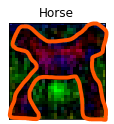

(10, 3072)


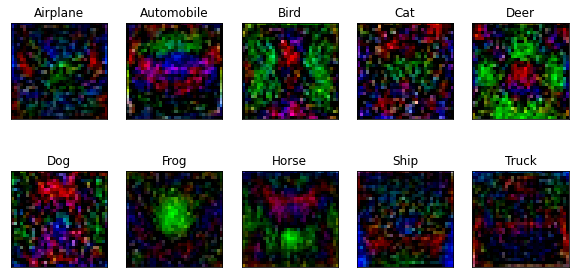

In [ ]:
from matplotlib.pyplot import figure
from matplotlib import pyplot as plt

figure(figsize=(10, 5))
weights = model1.coef_.copy()
print(weights.shape)
classes = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog'
, 'Frog', 'Horse', 'Ship', 'Truck']
for i in range(10):
  plt.subplot(2, 5, i+1)
  weight1 = weights[i,:].reshape([32,32,3])
  weight1 *= 1.0/weight1.max()
  weight2 = np.clip(weight1, 0, 1)
  plt.title(classes[i])
  plt.imshow(weight2)
  frame1 = plt.gca()
  frame1.axes.get_xaxis().set_visible(False)
  frame1.axes.get_yaxis().set_visible(False)

##**Visualization tools for unveiling the classification strategy**

**c) Após executar as duas últimas células para os dois classificadores (troque os comandos das duas primeiras linhas), por que a estratégia do RidgeClassifier aparentemente não está evidenciada?**

<p align="justify">Por conta do fato citado na questão b, como o RidgeClassifier usa o mesmo λ para todas as classes esse valor é uma aproximação de todas elas dificultando a compreensão do resultado.</p>

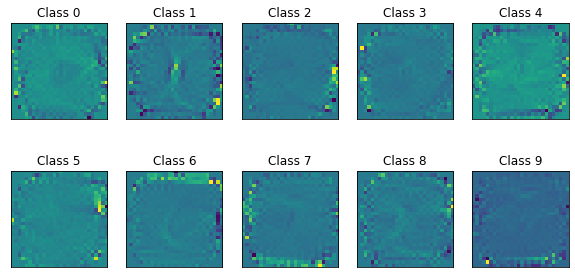

In [21]:
# Only for the MNIST dataset
weights = model.coef_.copy() # Run this command for the RidgeClassifier
# weights = model1.coef_.copy() # Run this command for the RidgeClassifierCV
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    weight = weights[i,:].reshape([28,28])
    plt.title(f'Class {i}')
    plt.imshow(weight, cmap='viridis')
    frame1 = plt.gca()
    frame1.axes.get_xaxis().set_visible(False)
    frame1.axes.get_yaxis().set_visible(False)

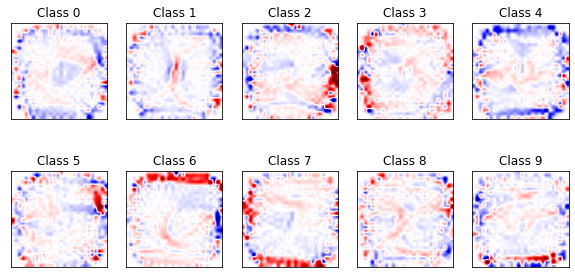

In [22]:
# Only for the MNIST dataset
weights = model.coef_.copy() # Run this command for the RidgeClassifier
# weights = model1.coef_.copy() # Run this command for the RidgeClassifierCV
scale = np.abs(weights).max()
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    weight = weights[i,:].reshape([28,28])
    plt.title(f'Class {i}')
    plt.imshow(weight, cmap=plt.cm.seismic, vmin=-scale/2, vmax=scale/2, interpolation='bilinear')
    frame1 = plt.gca()
    frame1.axes.get_xaxis().set_visible(False)
    frame1.axes.get_yaxis().set_visible(False)

**e) Comparando os dois conjuntos de dados (MNIST e CIFAR-10), o que pode sustentar a grande perda de desempenho verificada para o caso da base CIFAR-10?**

<p align="justify">A grande perda de desempenho se da pelo fato que as imagens do CIFAR-10 possuem mais variações do que as do MNIST, por exemplo cores, posições e angulos de visão diferentes. Como fazemos uso de somente um filtro o classificador tenta fazer o melhor possível porém a alta variabilidade das classes dificulta a tarefa. Adicionar mais filtros é uma solução simples que melhoraria o desempenho do classificador no caso da MNIST.</p>